# Assignment 2 Car Reviews

In case you haven't downloaded spacy, please uncoment the cell below:

In [16]:
#!python -m spacy download en

In [21]:
import numpy as np
import pandas as pd
import re
import spacy
import time

In [22]:
nlp = spacy.load("en_core_web_sm")

## Part 1 Baseline solution - Naïve Bayes classifier

#### Step 1: Panadas will be used to read the csv file.

In [23]:
df = pd.read_csv('car-reviews.csv')
df.shape

(1382, 2)

In [24]:
df.tail()

,Sentiment,Review
1377,Pos,In June we bought the Sony Limited Edition Fo...
1378,Pos,After 140 000 miles we decided to replace my...
1379,Pos,The Ford Focus is a great little record setti...
1380,Pos,I needed a new car because my hyundai excel 9...
1381,Pos,The 2000 Ford Focus SE 4 door sedan has a spa...


#### Step 2: Text Preprocessing

Following steps will be taken as text processing:

1) Remove punctuation and turn the words into case-insensitive way - The `clean_up` function was created 

2) Remove stopword - The `stop_word` function was created. The stop words are based on `en_core_web_sm` language model in spacy. 

3) Lemmatization - The `lemmas` was built. The main purpose is to get turn the words back to their basic form. 
    

In [25]:
def clean_up(doc):
    text = (re.sub('\W+', ' ',doc)).lower()
    text = text.strip()
    return text
    
def stop_word(doc):  
    doc = nlp(doc, disable=["parser", "ner"])
    tokens = [token for token in doc if not token.is_stop]
    return tokens

def lemmas(doc):  
    doc = nlp(doc, disable=["parser", "ner"])
    lemmas = []
    for token in doc:
        lemmas.append(token.lemma_)
    
    return lemmas

def processed_data(df):
    df = df.apply(lambda x: clean_up(x))
    df = df.apply(lambda x: stop_word(x))
    f = lambda x: x.text
    df = df.apply(lambda x: list(map(f,x)))
    df = df.apply(lambda x: ' '.join(x))
    df = df.apply(lambda x: lemmas(x))
    df = df.apply(lambda x: ' '.join(x))
    return df

To make it more clear, a new column "Processed" will be created to store the processed data in the dataframe. 

(`Remark` it will take around 48 seconds to load)

In [26]:
p = processed_data(df['Review'])
df["Proccesed"] = p
df

,Sentiment,Review,Proccesed
0,Neg,In 1992 we bought a new Taurus and we really ...,1992 buy new taurus love 1999 decide try new t...
1,Neg,The last business trip I drove to San Franci...,business trip drive san francisco go hertz ren...
2,Neg,My husband and I purchased a 1990 Ford F250 a...,husband purchase 1990 ford f250 problem own ve...
3,Neg,I feel I have a thorough opinion of this truc...,feel thorough opinion truck compare post evalu...
4,Neg,AS a mother of 3 all of whom are still in ca...,mother 3 carseat logical thing trade 200sx min...
...,...,...,...
1377,Pos,In June we bought the Sony Limited Edition Fo...,june buy sony limited edition focus se 4 dr se...
1378,Pos,After 140 000 miles we decided to replace my...,140 000 mile decide replace wife 1990 toyota c...
1379,Pos,The Ford Focus is a great little record setti...,ford focus great little record set car car win...
1380,Pos,I needed a new car because my hyundai excel 9...,need new car hyundai excel 91 decide shop nice...


Moreover, the below section demonstrates that words with the same stem have been appropriately recognised and treated as variations of the stem. 

Following four examples will be shown. All these words are selected from the `car-reviews.csv`

1) `driving`, `drove`, `drive`, `driven` - They are different tenses of `drive`

2) `give`, `gave`, `give` - They are different tenses of `give`

3) `seen`, `saw`, `see` - They are different tenses of `see`

4) `expense`, `expenses` - The difference is the plural form
    

In [7]:
Example_1 = nlp('driving drove drive driven')
print (f"Result of Example 1: {lemmas(Example_1)}")

Example_2 = nlp('give gave given')
print(f"Result of Example 2: {lemmas(Example_2)}")

Example_3 = nlp('seen saw see')
print(f"Result of Example 3: {lemmas(Example_3)}")

Example_4 = nlp('expense expenses')
print(f"Result of Example 4: {lemmas(Example_4)}")

Result of Example 1: ['drive', 'drive', 'drive', 'drive']
Result of Example 2: ['give', 'give', 'give']
Result of Example 3: ['see', 'see', 'see']
Result of Example 4: ['expense', 'expense']


#### Step 3: CountVectorizer

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

The number of times that a word (stem) appears

(`Remark` - It takes around 8-10 seconds to load)

In [9]:
cv = CountVectorizer()
corpus = list(df["Proccesed"])

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
Y = vectorizer.get_feature_names()
Z = np.array(Y)

Z = Z.reshape((1, len(Y)))
Vec = X.toarray()

cv_matrix = np.vstack((Z,Vec))
cv_result= pd.DataFrame(cv_matrix)
cv_result.columns = cv_result.iloc[0]
cv_result = cv_result.reindex(cv_result.index.drop(0)).reset_index(drop=True)
cv_result.columns.name = None
cv_result.head()

,00,000,0000,000k,000kms,00a,00p,01,0110,02,...,ztec,ztech,zts,ztw,zx,zx2,zx2s,zx3,zx3s,zx5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Step 4 Train Test Split and Load the Naive Bayes Classifier

In the section below, we will conduct the following steps:

1) Split the data between training and testing data sets randomly 
 
2) Load the Naive Bayes Classifier

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = Vec
y = df['Sentiment']

80% of the data has been used to train the classification model, and that the remaining 20% of the data set has been used as test data

As our data set has 1381, the size of training data set will be 1381*80%  = 1104.8 (1105)

In [12]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
print("The number of row in the dependent varibables is:", X_train.shape[0])
print("The number of row in the the independent varibable is:", y_train.shape[0])

The number of row in the dependent varibables is: 1105
The number of row in the the independent varibable is: 1105


After spliting the data, we will include our data into the Naive Bayes Classifier. 

In [14]:
from sklearn.naive_bayes import MultinomialNB

In [15]:
Train_NB = MultinomialNB()
Train_NB.fit(X_train,y_train)

MultinomialNB()

In [16]:
predicted = Train_NB.predict(X_test)

#### Step 5  Performance of the Naive Bayes Classifier

Below are the libraries we will use to find out the performance of the Naive Bayes Classifier

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The cell below will be able to give us the initial result of the Naive Bayes Classifier, based on the car review data.

In [18]:
print('1) The confusion matrix is \n', '\n', confusion_matrix(y_test,predicted), '\n')
print('2) Below is the classifcation repot: \n', '\n', classification_report(y_test,predicted), '\n')
print("3) In this exercise, the accuracy of the Multinomial Naive Bayes Classifier is:", accuracy_score(y_test,predicted))

1) The confusion matrix is 
 
 [[104  35]
 [ 30 108]] 

2) Below is the classifcation repot: 
 
               precision    recall  f1-score   support

         Neg       0.78      0.75      0.76       139
         Pos       0.76      0.78      0.77       138

    accuracy                           0.77       277
   macro avg       0.77      0.77      0.77       277
weighted avg       0.77      0.77      0.77       277
 

3) In this exercise, the accuracy of the Multinomial Naive Bayes Classifier is: 0.7653429602888087


To covert the result in a readable format, we will use the enhance the confusion matrix layout. Please see beloew

Reference for the data visualization: (Confusion Matrix Visualization, 2022)

[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

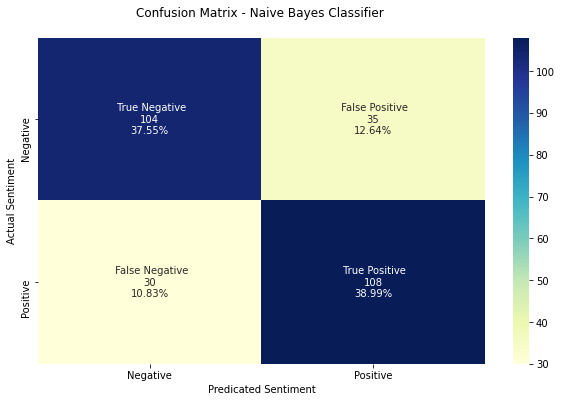

In [19]:
r = confusion_matrix(y_test,predicted)

plt.figure(figsize=(10,6))
sns.set_context(font_scale=1.5)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in r.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in r.flatten()/np.sum(r)]
labels = [f' {v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
table = sns.heatmap(r,cmap="YlGnBu",fmt='', annot= labels)

table.set_title('Confusion Matrix - Naive Bayes Classifier \n')
table.set_xlabel('Predicated Sentiment')
table.set_ylabel('Actual Sentiment')
table.xaxis.set_ticklabels(['Negative','Positive'])
table.yaxis.set_ticklabels(['Negative','Positive'])

## Part 2 Improved Solution

#### Step A: Set Up N-grams

We will try out different N-grams possibilities to select the most accurate one, which will be (1,4).

By using N-grams, the accuracy increased from 76.53 to 77.62

Reference: (How to use CountVectorizer for n-gram analysis, 2022)

(`Remark` It takes around  2 -3 minutes to load 8 different ngram scenarios.)

In [20]:
start = time.process_time()

corpus_2 = list(df["Proccesed"])
y2 = df['Sentiment']

for j in range (1,3):
    for i in range (2,6):
        vectorizer2 = CountVectorizer(ngram_range = (j,i))
        X2 = vectorizer2.fit_transform(corpus_2)
        Y2 = vectorizer2.get_feature_names()
        Z2 = np.array(Y2)

        Z2 = Z2.reshape((1, len(Y2)))
        X2 = X2.toarray()

        X_train, X_test, y_train, y_test =  train_test_split(X2, y2, test_size=0.2, random_state=1)
        Train_NB.fit(X_train,y_train)

        predicted2= Train_NB.predict(X_test)

        corectness2 = accuracy_score(y_test,predicted2)
        print(f"The accuracy of the Multinomial Naive Bayes Classifier with n_gram ({j}, {i}), is:", corectness2)
        
print(time.process_time() - start)

The accuracy of the Multinomial Naive Bayes Classifier with n_gram (1, 2), is: 0.7581227436823105
The accuracy of the Multinomial Naive Bayes Classifier with n_gram (1, 3), is: 0.7725631768953068
The accuracy of the Multinomial Naive Bayes Classifier with n_gram (1, 4), is: 0.776173285198556
The accuracy of the Multinomial Naive Bayes Classifier with n_gram (1, 5), is: 0.7472924187725631
The accuracy of the Multinomial Naive Bayes Classifier with n_gram (2, 2), is: 0.7292418772563177
The accuracy of the Multinomial Naive Bayes Classifier with n_gram (2, 3), is: 0.740072202166065
The accuracy of the Multinomial Naive Bayes Classifier with n_gram (2, 4), is: 0.7075812274368231
The accuracy of the Multinomial Naive Bayes Classifier with n_gram (2, 5), is: 0.6931407942238267
301.875


#### Step B: Using Tf-idf

Also, instead of Countvectorizer, we will try using TFIDF to vectorize the features in the cotrpus. The formula can be found in (Rahman et al., 2020)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tf-idf with ngram (1,4), the accuracy is 75.81

In [22]:
y3 = df['Sentiment']

vectorizer3 = TfidfVectorizer(ngram_range = (1,4))
X3 = vectorizer3.fit_transform(corpus_2)
Y3 = vectorizer3.get_feature_names()
Z3 = np.array(Y3)

Z3 = Z3.reshape((1, len(Y3)))
X3 = X3.toarray()

X_train, X_test, y_train, y_test =  train_test_split(X3, y3, test_size=0.2, random_state=1)
Train_NB.fit(X_train,y_train)

predicted3= Train_NB.predict(X_test)

corectness3 = accuracy_score(y_test,predicted3)
print(f"After using TFIDF, the accuracy of the Multinomial Naive Bayes Classifier with n_gram (1,4) is:", corectness3)

After using TFIDF, the accuracy of the Multinomial Naive Bayes Classifier with n_gram (1,4) is: 0.7581227436823105


Tf-idf without ngram, the accuracy is 78.70

In [23]:
y3 = df['Sentiment']

vectorizer3 = TfidfVectorizer()
X3 = vectorizer3.fit_transform(corpus_2)
Y3 = vectorizer3.get_feature_names()
Z3 = np.array(Y3)

Z3 = Z3.reshape((1, len(Y3)))
X3 = X3.toarray()

X_train, X_test, y_train, y_test =  train_test_split(X3, y3, test_size=0.2, random_state=1)
Train_NB.fit(X_train,y_train)

predicted3= Train_NB.predict(X_test)

corectness3 = accuracy_score(y_test,predicted3)
print(f"After using TFIDF, the accuracy of the Multinomial Naive Bayes Classifier without n_gram is:", corectness3)

After using TFIDF, the accuracy of the Multinomial Naive Bayes Classifier without n_gram is: 0.7870036101083032


#### Step C: Using SVC (without N-grams)

In this section, instead of using Naive Bayes Classifier, we will use Support Vector as our classifier.

In [24]:
from sklearn.svm import SVC

In [25]:
Train_SVM = SVC()

In [26]:
y4 = df['Sentiment']

vectorizer4 = TfidfVectorizer()
X4 = vectorizer4.fit_transform(corpus_2)
Y4 = vectorizer4.get_feature_names()
Z4 = np.array(Y4)

Z4 = Z4.reshape((1, len(Y4)))
X4 = X4.toarray()

X_train, X_test, y_train, y_test =  train_test_split(X4, y4, test_size=0.2, random_state=1)
Train_SVM.fit(X_train,y_train)

predicted4 = Train_SVM.predict(X_test)

corectness4 = accuracy_score(y_test,predicted4)
print(f"After using TFIDF, the accuracy of the SVM Classifier without n_gram is:", corectness4)

After using TFIDF, the accuracy of the SVM Classifier without n_gram is: 0.8014440433212996


In [27]:
start = time.process_time()

y5 = df['Sentiment']

vectorizer5 = CountVectorizer()
X5 = vectorizer5.fit_transform(corpus_2)
Y5 = vectorizer5.get_feature_names()
Z5 = np.array(Y5)

Z5 = Z5.reshape((1, len(Y5)))
X5 = X5.toarray()

X_train, X_test, y_train, y_test =  train_test_split(X5, y5, test_size=0.2, random_state=1)
Train_SVM.fit(X_train,y_train)

predicted5 = Train_SVM.predict(X_test)

corectness5 = accuracy_score(y_test,predicted5)
print(f"With CountVectorizer, the accuracy of the SVM Classifier without n_gram is", corectness5)

print(time.process_time() - start)

With CountVectorizer, the accuracy of the SVM Classifier without n_gram is 0.7942238267148014
56.0


#### Step C: Result Comparasion

The below table shows the accuracy of different methods. The SVM-TFIDF method has the best performance (accuracy at 80.14%)
Reference to visualization: (barchart and Boston, 2022)

Text(0, 0.5, 'Accuary (%) \n')

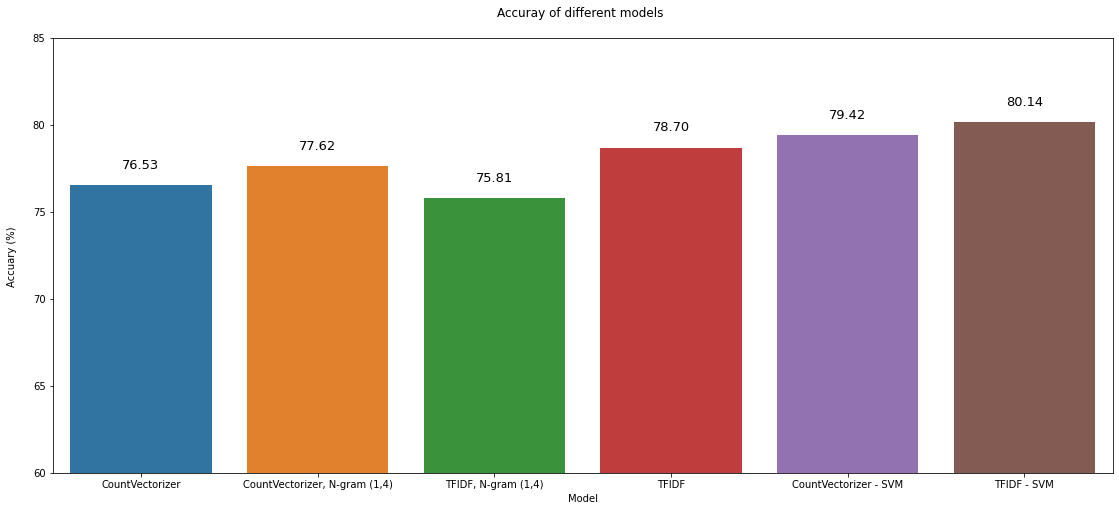

In [28]:
data = [['CountVectorizer',76.53],['CountVectorizer, N-gram (1,4)',77.62],['TFIDF, N-gram (1,4)',75.81], 
        ['TFIDF',78.70], ['CountVectorizer - SVM' ,79.42], 
        ['TFIDF - SVM', 80.14]]

result = pd.DataFrame(data,columns=['Model','Accuracy'],dtype=float)

plt.figure(figsize=(19,8))
sns.set_context(font_scale=0.5)
gfg = sns.barplot(x='Model',y='Accuracy', data=result)


for p in gfg.patches:
    gfg.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=13, color='black', xytext=(0, 20),
                textcoords='offset points')


gfg.set_ylim(60, 85)
gfg.set_title('Accuray of different models \n')
gfg.set_ylabel('Accuary (%) \n')


#### Step D: Explaination

Based on the result, the SVM classifier brings us a more accurate result compared to the Naive Bayes Classifier. One of the potential reasons is that the Naive Bayes Classifier treats different words (features) independently, which may not be able to provide an accurate result when two words have a similar meaning. However, for SVM Classifier, it uses the hyperplane to divide to separate the data into different groups. It somehow looks at the interaction between words as the words with similar meanings would usually fall into the same group.
Also, based on the previous empirical study, the Naive Bayes Classifier usually performs better in a sentence but SVM better in the paragraph. It aligns with our exercise. (In general, Heartnet and Goodman, 2022)

Meanwhile, N-gram did not improve the performance significantly in our exercise, when we select the TFIDF to vectorize our features. The reason is that TFIDF gives a higher rating when a word or a pattern of words is rare across the different documents, which may bring us an overfitting case. When we use N-gram, it is easier to have a unique word pattern which causes an overfitting issue.

## Reference 

[1] barchart, D. and Boston, S., 2022. Displaying of values on barchart. [online] Stack Overflow. Available from: https://stackoverflow.com/questions/45946970/displaying-of-values-on-barchart [Accessed 11 Apr. 2022].

[2] Anon, 2022. Confusion Matrix Visualization. [online] Medium. Available from: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea [Accessed 11 Apr. 2022].

[3] Anon, 2022. How to use CountVectorizer for n-gram analysis. [online] Practicaldatascience.co.uk. Available from: https://practicaldatascience.co.uk/machine-learning/how-to-use-count-vectorization-for-n-gram-analysis [Accessed 11 Apr. 2022].

[4] In general, w., Heartnet, T. and Goodman, T., 2022. In general, when does TF-IDF reduce accuracy?. [online] Data Science Stack Exchange. Available from: https://datascience.stackexchange.com/questions/13660/in-general-when-does-tf-idf-reduce-accuracy [Accessed 11 Apr. 2022].

[5] Rahman, S., Biplob, K., Rahman, M., Sarker, K. and Islam, T., 2020. An Investigation and Evaluation of N-Gram, TF-IDF and Ensemble Methods in Sentiment Classification. Cyber Security and Computer Science, pp.391-402.